In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

In [2]:
#get the images via a directory iterator

In [3]:
# take the images with an directory iterator
datagen = idg(rescale =1./255,
              rotation_range=0.02,
              width_shift_range=0.12,
              height_shift_range=0.05,
              shear_range=0.25,
              zoom_range=0.2,
              horizontal_flip = True,
            validation_split=0.2
              )

train = datagen.flow_from_directory('Dog Emotion',
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode= 'categorical',
                                          subset='training' )

Found 3200 images belonging to 4 classes.


In [4]:
val = datagen.flow_from_directory('Dog Emotion',
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='categorical',
                                          subset='validation'

                                        )

Found 800 images belonging to 4 classes.


##  visualize some of the images

In [5]:
import matplotlib.pyplot as plt

viz_x,viz_y = val.next()

In [6]:
ls = []
for i in viz_y:
    for index,value in enumerate(i):
        if value == 1:
            ls.append(index)


labels = []
for i in ls:
    if i == 2:
        labels.append('relaxed')
    elif i == 1:
        labels.append('happy')
    elif i == 3:
        labels.append('sad')
    else :
        labels.append('angry')


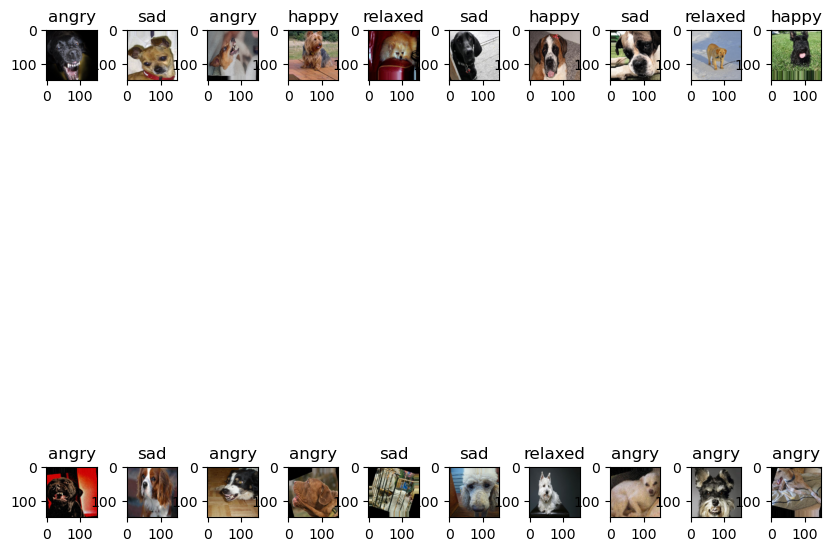

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.subplots_adjust(bottom=0.2, hspace=0.8, wspace=0.6)
    plt.imshow(viz_x[i])
    plt.title(labels[i])
    

Text(0.5, 1.0, 'relaxed')

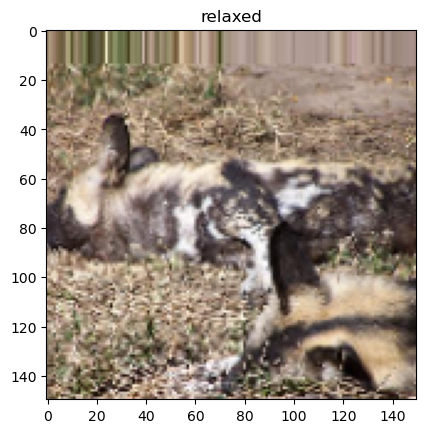

In [8]:
plt.imshow(viz_x[31])
plt.title(labels[31])

#  create the callbacks for our model 

In [9]:
from tensorflow.keras.callbacks import CSVLogger ,EarlyStopping ,LearningRateScheduler as lrs ,  ReduceLROnPlateau as rlrp,ModelCheckpoint

In [10]:
#csv
csv_cal = CSVLogger('history.csv',separator=',',append=True)


#early stoping
stop_call = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False)

#change lr
plateau_callback = rlrp(
    monitor='val_accuracy', factor=0.1, patience=6, verbose=1
)



checkpoint = ModelCheckpoint('dog_emotion_detector.h5',monitor='val_loss',save_best_only=True
                                                 ,save_weights_only=True,
                                                 verbose=1)

# now create the model 

In [11]:
#now lets create the model !!
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(Input(shape=(150,150,3)))

# Convolutional block 1
cnn_model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
cnn_model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(64,( 5, 5), activation='relu', padding='same'))
cnn_model.add(Conv2D(64,( 5, 5), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(BatchNormalization())

# Convolutional block 2
cnn_model.add(Conv2D(256,( 3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(256,( 3,3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=2))

cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())



# Dense block
cnn_model.add(Dense(512, activation='relu', kernel_regularizer=('l1_l2')))

cnn_model.add(Dropout(0.4))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=('l1_l2')))

cnn_model.add(Dropout(0.4))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(4, activation='softmax'))



cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 75, 75, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)       

# model compile 

In [12]:
cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])


# model train

In [13]:
hist = cnn_model.fit(train,validation_data=val,epochs=130,callbacks=[checkpoint,plateau_callback,csv_cal])

Epoch 1/130


100/100 [==============================] - ETA: 0s - loss: 239.5751 - accuracy: 0.2931
Epoch 1: val_loss improved from inf to 86.30991, saving model to dog_emotion_detector.h5
100/100 [==============================] - 546s 5s/step - loss: 239.5751 - accuracy: 0.2931 - val_loss: 86.3099 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/130
100/100 [==============================] - ETA: 0s - loss: 75.6990 - accuracy: 0.2891
Epoch 2: val_loss improved from 86.30991 to 67.02665, saving model to dog_emotion_detector.h5
100/100 [==============================] - 551s 6s/step - loss: 75.6990 - accuracy: 0.2891 - val_loss: 67.0266 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/130
100/100 [==============================] - ETA: 0s - loss: 63.5229 - accuracy: 0.2934
Epoch 3: val_loss improved from 67.02665 to 57.41231, saving model to dog_emotion_detector.h5
100/100 [==============================] - 545s 5s/step - loss: 63.5229 - accuracy: 0.2934 - val_loss: 57.4123 - val_accuracy: 0.28

Epoch 25/130
100/100 [==============================] - ETA: 0s - loss: 22.3129 - accuracy: 0.4762
Epoch 25: val_loss did not improve from 21.65960
100/100 [==============================] - 545s 5s/step - loss: 22.3129 - accuracy: 0.4762 - val_loss: 22.3509 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 26/130
100/100 [==============================] - ETA: 0s - loss: 22.2940 - accuracy: 0.4756
Epoch 26: val_loss did not improve from 21.65960
100/100 [==============================] - 539s 5s/step - loss: 22.2940 - accuracy: 0.4756 - val_loss: 23.8326 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 27/130
100/100 [==============================] - ETA: 0s - loss: 23.0520 - accuracy: 0.4834
Epoch 27: val_loss did not improve from 21.65960
100/100 [==============================] - 536s 5s/step - loss: 23.0520 - accuracy: 0.4834 - val_loss: 22.4763 - val_accuracy: 0.3825 - lr: 0.0010
Epoch 28/130
100/100 [==============================] - ETA: 0s - loss: 22.6039 - accuracy: 0.4797
Epoch 28: val_lo

100/100 [==============================] - ETA: 0s - loss: 4.3164 - accuracy: 0.6625
Epoch 52: val_loss improved from 4.38133 to 4.27762, saving model to dog_emotion_detector.h5
100/100 [==============================] - 537s 5s/step - loss: 4.3164 - accuracy: 0.6625 - val_loss: 4.2776 - val_accuracy: 0.6100 - lr: 1.0000e-04
Epoch 53/130
100/100 [==============================] - ETA: 0s - loss: 4.2509 - accuracy: 0.6513
Epoch 53: val_loss improved from 4.27762 to 4.24863, saving model to dog_emotion_detector.h5
100/100 [==============================] - 540s 5s/step - loss: 4.2509 - accuracy: 0.6513 - val_loss: 4.2486 - val_accuracy: 0.6100 - lr: 1.0000e-04
Epoch 54/130
100/100 [==============================] - ETA: 0s - loss: 4.1789 - accuracy: 0.6628
Epoch 54: val_loss improved from 4.24863 to 4.24351, saving model to dog_emotion_detector.h5
100/100 [==============================] - 540s 5s/step - loss: 4.1789 - accuracy: 0.6628 - val_loss: 4.2435 - val_accuracy: 0.6313 - lr: 1.00

100/100 [==============================] - 538s 5s/step - loss: 1.4957 - accuracy: 0.7481 - val_loss: 1.6350 - val_accuracy: 0.6650 - lr: 1.0000e-05
Epoch 79/130
100/100 [==============================] - ETA: 0s - loss: 1.4529 - accuracy: 0.7475
Epoch 79: val_loss improved from 1.63503 to 1.57935, saving model to dog_emotion_detector.h5
100/100 [==============================] - 541s 5s/step - loss: 1.4529 - accuracy: 0.7475 - val_loss: 1.5794 - val_accuracy: 0.6575 - lr: 1.0000e-05
Epoch 80/130
100/100 [==============================] - ETA: 0s - loss: 1.4102 - accuracy: 0.7547
Epoch 80: val_loss improved from 1.57935 to 1.54367, saving model to dog_emotion_detector.h5
100/100 [==============================] - 541s 5s/step - loss: 1.4102 - accuracy: 0.7547 - val_loss: 1.5437 - val_accuracy: 0.6925 - lr: 1.0000e-05
Epoch 81/130
100/100 [==============================] - ETA: 0s - loss: 1.4044 - accuracy: 0.7425
Epoch 81: val_loss did not improve from 1.54367
100/100 [================

100/100 [==============================] - ETA: 0s - loss: 0.8514 - accuracy: 0.7506
Epoch 129: val_loss did not improve from 0.99165
100/100 [==============================] - 541s 5s/step - loss: 0.8514 - accuracy: 0.7506 - val_loss: 1.0304 - val_accuracy: 0.6750 - lr: 1.0000e-13
Epoch 130/130
100/100 [==============================] - ETA: 0s - loss: 0.8581 - accuracy: 0.7509
Epoch 130: val_loss did not improve from 0.99165
100/100 [==============================] - 538s 5s/step - loss: 0.8581 - accuracy: 0.7509 - val_loss: 1.0215 - val_accuracy: 0.6625 - lr: 1.0000e-13


## load the best weights 

In [14]:
cnn_model.load_weights('dog_emotion_detector.h5')


# lets see the filters of the first conv layer

In [15]:
layer = cnn_model.layers

filters,weights = cnn_model.layers[0].get_weights()
print(layer[0].name,filters.shape)

conv2d (5, 5, 3, 32)


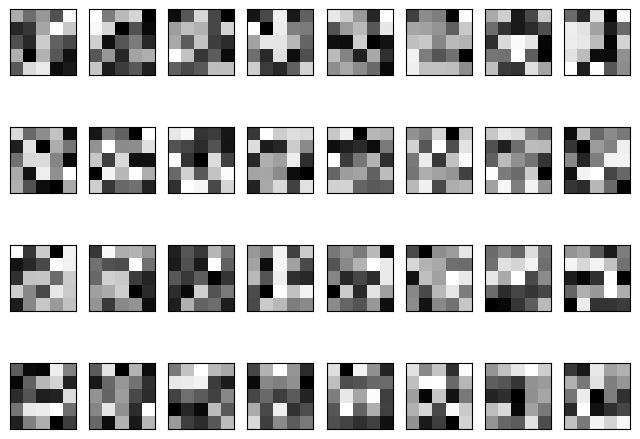

In [16]:
fig1 = plt.figure(figsize=(8,12))

columns = 8
rows = 8
n_filters  = 32
for i in range(1,n_filters+1):
    f = filters[:,:,:,i-2]
    fig1 = plt.subplot(rows,columns,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:,:,0],cmap='grey')

# now lets see how they correspond to an image

In [17]:
from tensorflow.keras.models import Model
conv_indexes = [1,2] # the index of the conv layers i will use
outpouts = [cnn_model.layers[i].output for i in conv_indexes]
filter_model = Model(inputs=cnn_model.inputs,outputs = outpouts)

In [18]:
conv_image = train.next()[0][0]

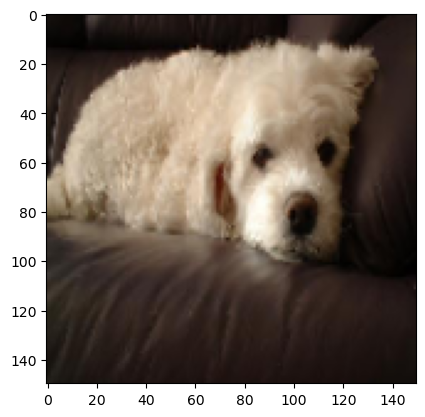

In [19]:
plt.imshow(conv_image)

In [20]:
conv_image.shape

(150, 150, 3)

In [21]:
conv_image = np.expand_dims(conv_image,axis=0)

In [22]:
conv_output = filter_model.predict(conv_image)

1/1 [==============================] - 0s 484ms/step


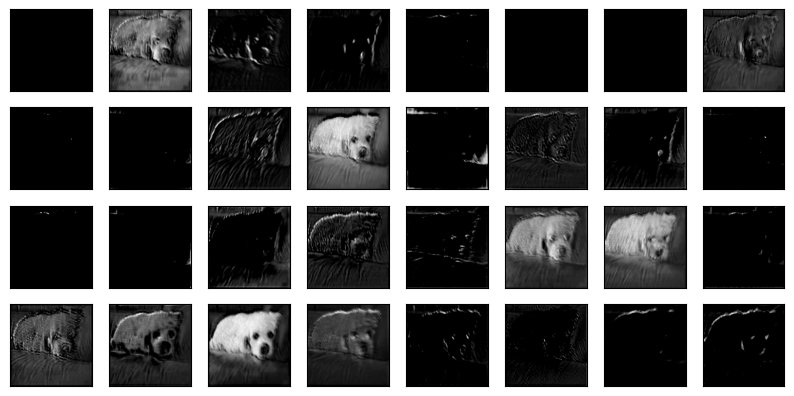

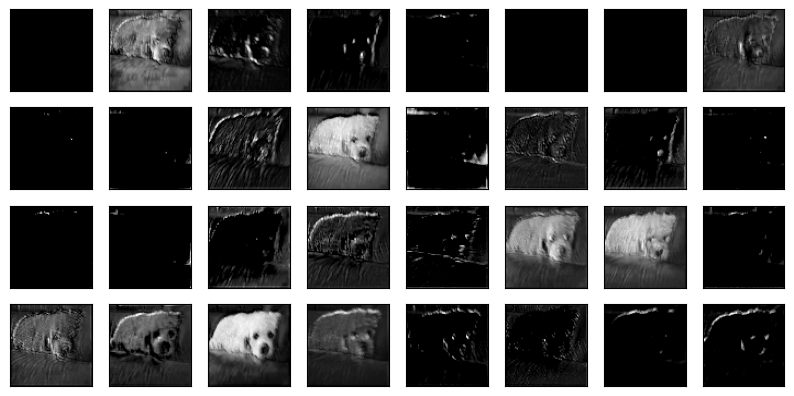

In [23]:

columns = 8
rows = 8
for j in conv_output:
    fig = plt.figure(figsize=(10,10))
    for i in range(1,32+1):
        fig2 = plt.subplot(rows,columns,i)
        fig2.set_xticks([])
        fig2.set_yticks([])
        plt.imshow(j[0,:,:,i-1],cmap='grey')
    plt.show()

# lets now we the performance of our model

Text(0.5, 0.98, ' training accuracy vs validation accuracy')

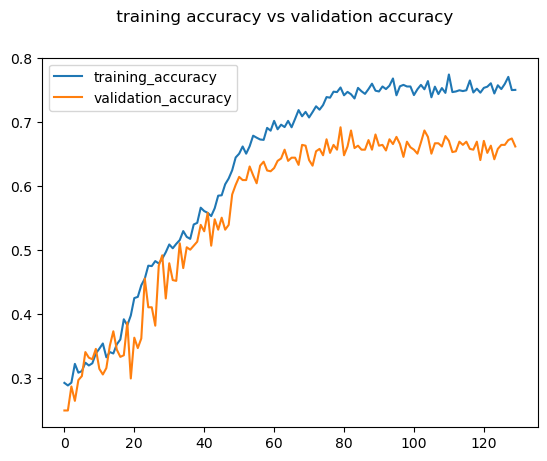

In [24]:
fig,ax = plt.subplots()

ax.plot(hist.history['accuracy'])
ax.plot(hist.history['val_accuracy'])
ax.legend(['training_accuracy','validation_accuracy'])
fig.suptitle(' training accuracy vs validation accuracy')


Text(0.5, 0.98, ' training loss vs validation loss')

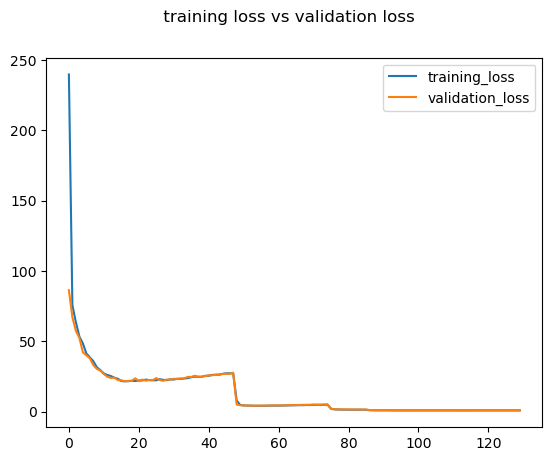

In [25]:
fig,ax = plt.subplots()

ax.plot(hist.history['loss'])
ax.plot(hist.history['val_loss'])
ax.legend(['training_loss','validation_loss'])
fig.suptitle(' training loss vs validation loss')


# lets now make some predictions using  photos of my dog !

In [26]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder= 'test'

images = load_images_from_folder(folder)

In [27]:
#resize and rescale the images

for i in range(len(images)) :
    images[i] = tf.image.resize(images[i],(150,150))
    
for i in range(len(images)) :
    images[i] = (images[i]/255.)    

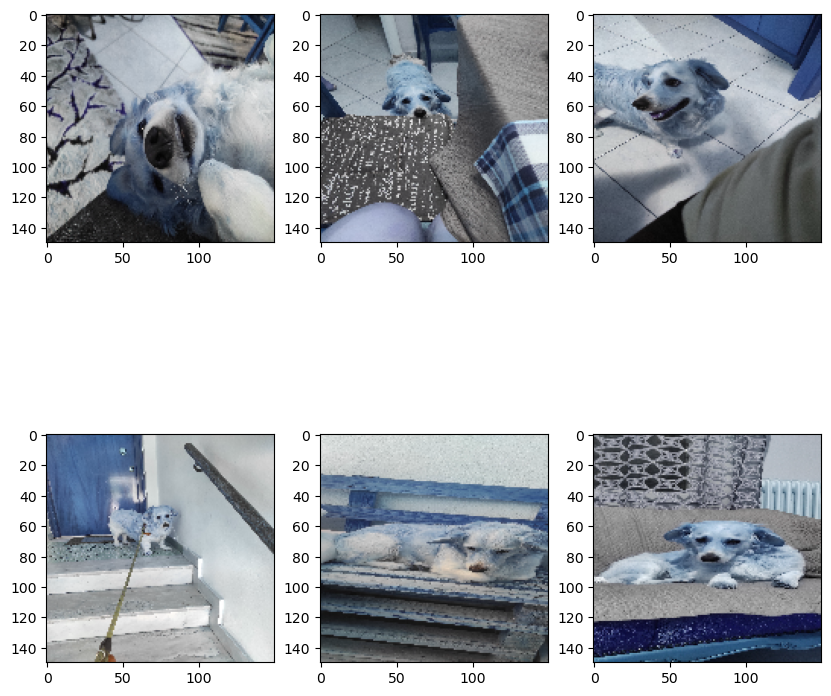

In [28]:
# print them
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])

In [29]:


for i in range(len(images)):
    images[i] = np.expand_dims(images[i],axis=0)



In [30]:
preds = []
for i in images:
    pred = cnn_model.predict(i)
    preds.append(pred)

1/1 [==============================] - 0s 219ms/step


In [31]:
clases = []
for i in preds:
    x = i.argmax()
    clases.append(x)

for i in range(len(clases)):
    if clases[i] == 0 :
        clases[i] = 'angry'
    elif clases[i] == 1 :
        clases[i] = 'happy'
        
    elif clases[i] == 2 :
        clases[i] = 'relaxed'
    else:
        clases[i] = 'sad'
        

In [32]:
images[0].shape

(1, 150, 150, 3)

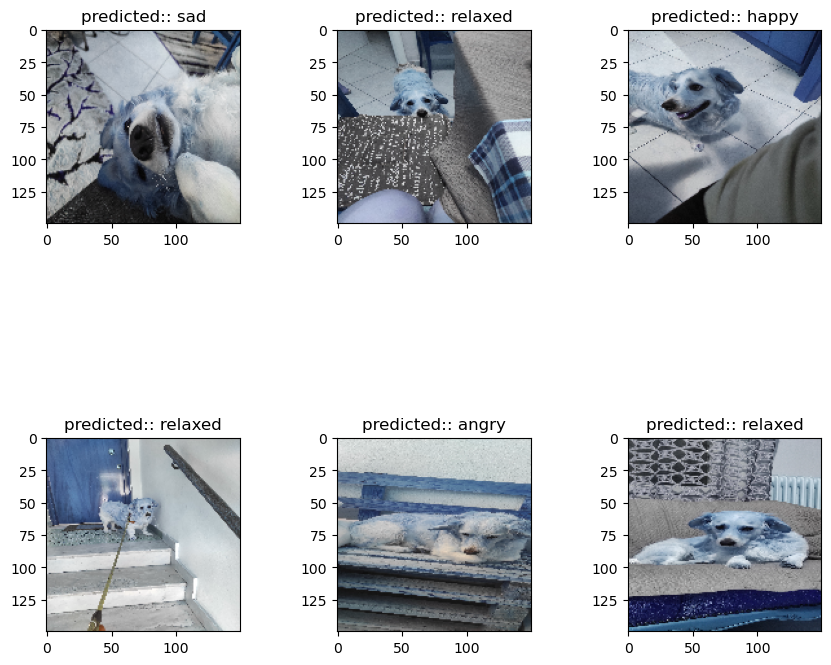

In [33]:
for i in range(len(images)):
    images[i] = np.squeeze(images[i])
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplots_adjust(bottom=0.2, hspace=0.5, wspace=0.5)
    ax = plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(f"predicted:: {clases[i]}")


#  confusion matrix and metrics for our validation data

In [34]:
val_pred = cnn_model.predict(val)

25/25 [==============================] - 37s 1s/step


In [35]:
val_pred_class = np.argmax(val_pred,axis=1)

In [36]:
true_clases = val.classes

In [37]:
class_labels = list(val.class_indices.keys())   


In [38]:
import sklearn.metrics
report = sklearn.metrics.classification_report(true_clases, val_pred_class, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

       angry       0.21      0.17      0.19       200
       happy       0.23      0.23      0.23       200
     relaxed       0.28      0.32      0.30       200
         sad       0.25      0.26      0.25       200

    accuracy                           0.24       800
   macro avg       0.24      0.24      0.24       800
weighted avg       0.24      0.24      0.24       800



<Axes: >

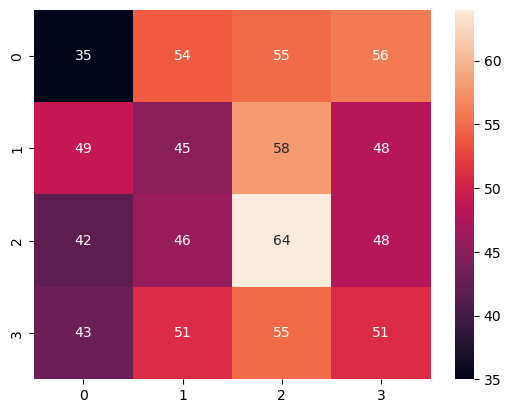

In [39]:
confusion_matrix = sklearn.metrics.confusion_matrix(true_clases, val_pred_class)  # shape=(12, 12)
confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True)